# A Preliminary Study on the Interrelationships Among Sleep, Stress, and Physical Activity

<p align="right">--By Group 31 WIX1007</p>

## 1.Preparation: Import Dataset from google drive

In [10]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = "/content/drive/MyDrive/WIA1007_Project/unclean_smartwatch_health_data.csv"
df = pd.read_csv(file_path)

## 2.Preprocessing
### 2.1 Check the basic information of the dataset

In [12]:
df.info()

print("\nMissing value")
print(df.isnull().sum())

print("\nUnique Category")
print(df['Activity Level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB

Missing value
User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

Unique Category
['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


### 2.2 Pre-processing: Drop Irrelavent Columns & Casting Data Type

In [13]:
df = df.drop(columns=['Heart Rate (BPM)', 'Blood Oxygen Level (%)'], errors='ignore')

In [14]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')

### 2.3 Eliminating Outliers in Step Count

First we visualize the distribution and outliers of the column. Thus we can decide in what way we clean the outliers.

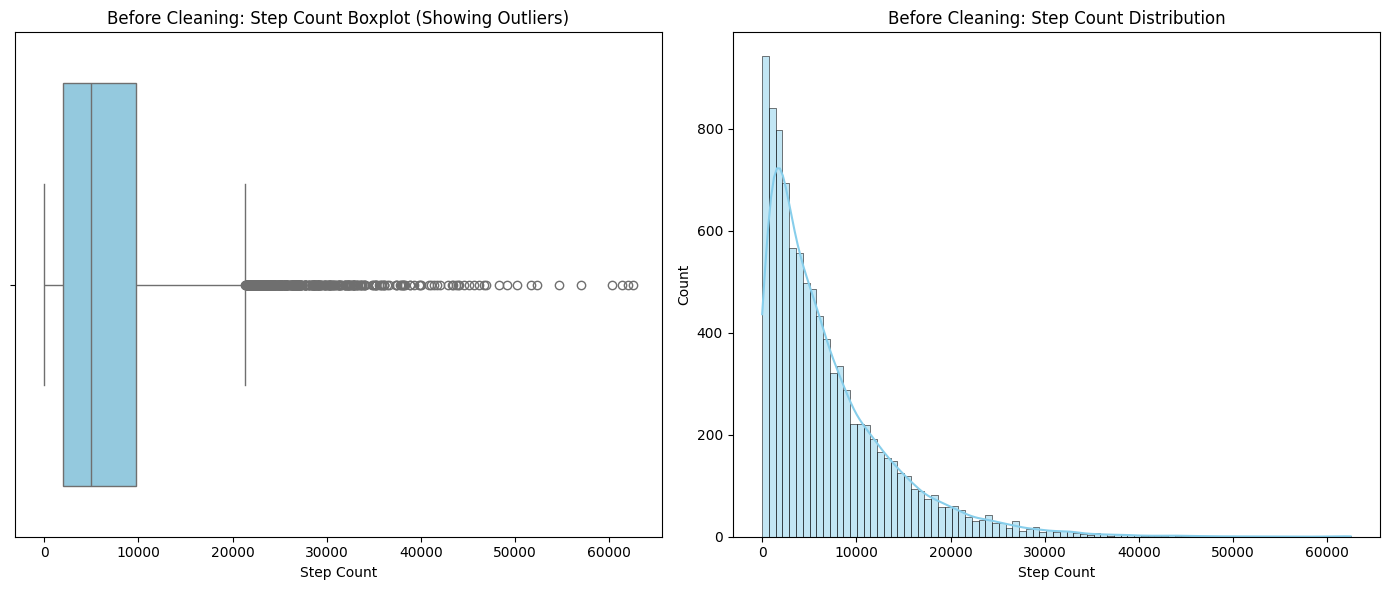

In [17]:
# figure 1
plt.figure(figsize=(14, 6))

# subplot: boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Step Count'], color='skyblue')
plt.title('Before Cleaning: Step Count Boxplot (Showing Outliers)')
plt.xlabel('Step Count')

# sublot: histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Step Count'], kde=True, color='skyblue')
plt.title('Before Cleaning: Step Count Distribution')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

Using the Boxplot analysis, we identified significant outliers in the Step Count variable. The histogram showed a highly skewed distribution.

In [ ]:
Q1 = df['Step Count'].quantile(0.25)
Q3 = df['Step Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
df = df[(df['Step Count'] >= lower_bound) & (df['Step Count'] <= upper_bound)]

 By applying the IQR method (1.5 * IQR), we successfully removed extreme values that likely resulted from sensor errors or non-standard usage, resulting in a more robust dataset for modeling.

In [ ]:
df['Activity Level'] = df['Activity Level'].str.replace('_', ' ').replace({'Actve': 'Active', 'Seddentary': 'Sedentary'})

In [ ]:
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())
df['Activity Level'] = df['Activity Level'].fillna(df['Activity Level'].mode()[0])
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna(subset=['User ID'])

In [ ]:
df.head()

In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_smartwatch_health_data.csv"
df.to_csv(output_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/WIA1007_Project/Mental_Health_Lifestyle_Dataset.csv"
df2 = pd.read_csv(file_path)

In [ ]:
df2 = df2.rename(columns={
    'Exercise Level': 'Activity Level',
    'Sleep Hours': 'Sleep Duration (hours)'
})


In [ ]:
df2 = df2[['Activity Level', 'Sleep Duration (hours)', 'Stress Level']]

In [ ]:
df2['Sleep Duration (hours)'] = df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].median())
df2['Activity Level'] = df2['Activity Level'].fillna(df2['Activity Level'].mode()[0])
df2['Stress Level'] = df2['Stress Level'].fillna(df2['Stress Level'].mode()[0])
#fill missing value

In [ ]:
stress = {'Low': 2, 'Moderate': 5, 'High': 8}
df2['Stress Level'] = df2['Stress Level'].map(stress)

In [ ]:
Q1 = df2['Sleep Duration (hours)'].quantile(0.25)
Q3 = df2['Sleep Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2['Sleep Duration (hours)'] >= (Q1 - 1.5 * IQR)) & (df2['Sleep Duration (hours)'] <= (Q3 + 1.5 * IQR))]

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.head()

In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_Mental_Health_Lifestyle_Dataset.csv"
df2.to_csv(output_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/WIA1007_Project/expanded_sleep_data_with_bio.csv"
df3 = pd.read_csv(file_path)

In [ ]:
df3 = df3.rename(columns={
    'Physical Activity Level': 'Activity Level',
    'Sleep Duration': 'Sleep Duration (hours)'
})


In [ ]:
df3 = df3[['Activity Level', 'Sleep Duration (hours)', 'Stress Level', 'Quality of Sleep']]

In [ ]:
for col in df3.columns:
    df3[col] = df3[col].fillna(df3[col].median())

In [ ]:
for col in ['Sleep Duration (hours)', 'Activity Level']:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    df3 = df3[(df3[col] >= (Q1 - 1.5 * IQR)) & (df3[col] <= (Q3 + 1.5 * IQR))]

In [ ]:
df3 = df3.drop_duplicates()

In [ ]:
df3.head()

In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_expanded_sleep_data_with_bio.csv"
df3.to_csv(output_path, index=False)